In [59]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug= pd.read_csv("data/mouse_drug_data.csv")
clinical_trial = pd.read_csv("data/clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data

# Combine the data into a single dataset
mouse_data_combine = pd.merge(clinical_trial, mouse_drug,how='outer', on="Mouse ID")

mouse_data_combine.head()

# Display the data table for preview



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [60]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_mean_group = mouse_data_combine.groupby(["Drug", "Timepoint"]).mean()
tumor_mean_group.reset_index(level = None, inplace = True)

In [61]:
# Convert to DataFrame
tumor_mean_df = pd.DataFrame(tumor_mean_group)
# Preview DataFrame
tumor_mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [62]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem = mouse_data_combine.groupby(["Drug", "Timepoint"]).sem()
tumor_sem.reset_index(level = None, inplace = True)

# Preview DataFrame

# Convert to DataFrame
tumor_sem_group = pd.DataFrame(tumor_sem)
# Preview DataFrame
tumor_sem_group.head()


,Drug,Timepoint,Metastatic Sites,Mouse ID,Tumor Volume (mm3)
0,Capomulin,0,0.000000,NaN,0.000000
1,Capomulin,5,0.074833,NaN,0.448593
2,Capomulin,10,0.125433,NaN,0.702684
3,Capomulin,15,0.132048,NaN,0.838617
4,Capomulin,20,0.161621,NaN,0.909731


In [66]:
# Minor Data Munging to Re-Format the Data Frames
reform_table = tumor_mean_df.pivot(index ="Timepoint", columns = 'Drug', values = "Tumor Volume (mm3)")
reform_table.reset_index(level = None, inplace = True)
#Preview the formatted table

# Preview that Reformatting worked
reform_table.head()



Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [67]:
drug_table = reform_table[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
drug_table.head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417


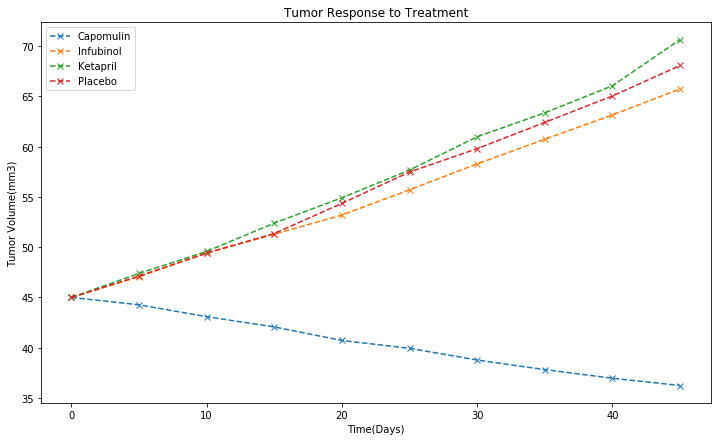

In [86]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (12,7))
# Save the Figure

plt.errorbar(x=drug_table['Timepoint'], y=drug_table['Capomulin'], yerr=None, linestyle="--", fmt='x')
plt.errorbar(x=drug_table['Timepoint'], y=drug_table['Infubinol'], yerr=None, linestyle="--", fmt='x')
plt.errorbar(x=drug_table['Timepoint'], y=drug_table['Ketapril'], yerr=None, linestyle="--", fmt='x')
plt.errorbar(x=drug_table['Timepoint'], y=drug_table['Placebo'], yerr=None, linestyle="--", fmt='x')

plt.ylabel('Tumor Volume(mm3)')
plt.xlabel('Time(Days)')
plt.title('Tumor Response to Treatment')
plt.legend()
plt.show()

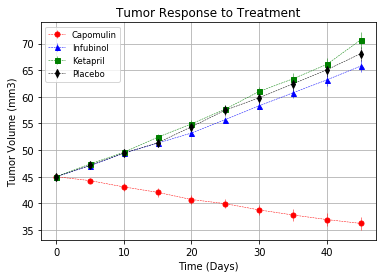

In [5]:
# Show the Figure


## Metastatic Response to Treatment

In [75]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met = mouse_data_combine.groupby(["Drug", "Timepoint"]).mean()

# Convert to DataFrame
met_response_mean = pd.DataFrame(mean_met["Metastatic Sites"])

# Preview DataFrame
met_response_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [76]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met = mouse_data_combine.groupby(["Drug", "Timepoint"]).sem()

# Convert to DataFrame
met_response_sem = pd.DataFrame(sem_met)

# Preview DataFrame
met_response_sem.head()



Metastatic Sites  Mouse ID  Tumor Volume (mm3)
Drug      Timepoint                                                
Capomulin 0                  0.000000       NaN            0.000000
          5                  0.074833       NaN            0.448593
          10                 0.125433       NaN            0.702684
          15                 0.132048       NaN            0.838617
          20                 0.161621       NaN            0.909731

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [78]:
# Minor Data Munging to Re-Format the Data Frames
met_response_mean.reset_index(level = None, inplace = True)
met_response_mean_df = pd.DataFrame(mouse_data_combine)

piv_table = met_response_mean.pivot(index ="Timepoint", columns = 'Drug', values = "Metastatic Sites")
piv_table.reset_index(level = None, inplace = True)

# Preview that Reformatting worked
piv_table.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [79]:
drug_table2= piv_table[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
drug_table2.head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.280000,0.304348,0.375000
2,10,0.320000,0.666667,0.590909,0.833333
3,15,0.375000,0.904762,0.842105,1.250000
4,20,0.652174,1.050000,1.210526,1.526316


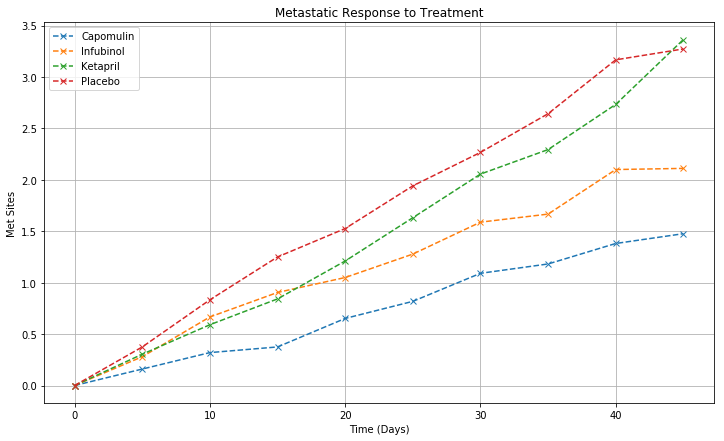

<Figure size 432x288 with 0 Axes>

In [87]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (12, 7))

plt.errorbar(x=drug_table2['Timepoint'],y=drug_table2['Capomulin'], yerr=None, linestyle="--", fmt='x')
plt.errorbar(x=drug_table2['Timepoint'],y=drug_table2['Infubinol'], yerr=None, linestyle="--", fmt='x')
plt.errorbar(x=drug_table2['Timepoint'],y=drug_table2['Ketapril'], yerr=None, linestyle="--",fmt='x')
plt.errorbar(x=drug_table2['Timepoint'],y=drug_table2['Placebo'], yerr=None, linestyle="--", fmt='x')

plt.ylabel("Met Sites")
plt.xlabel('Time (Days)')
plt.title('Metastatic Response to Treatment')
plt.grid()
plt.legend()       
plt.show()
# Save the Figure
plt.savefig("../MetSiteResponse.png")


## Survival Rates

In [90]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
micecnt = mouse_data_combine.groupby(["Drug","Timepoint"]).count()
    
# Convert to DataFrame
micecnt_df = pd.DataFrame(micecnt["Mouse ID"])
micecnt_df.reset_index(inplace= True)

# Preview DataFrame
micecnt_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [92]:
# Minor Data Munging to Re-Format the Data Frames
piv_table2 = micecnt_df.pivot(index= "Timepoint", columns= 'Drug', values = "Mouse ID")
piv_table2.reset_index(level = None, inplace = True)

# Preview the Data Frame
piv_table2.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17


In [94]:
drug_table3 = piv_table2[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
drug_table3.head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,25,25,25,25
1,5,25,25,23,24
2,10,25,21,22,24
3,15,24,21,19,20
4,20,23,20,19,19


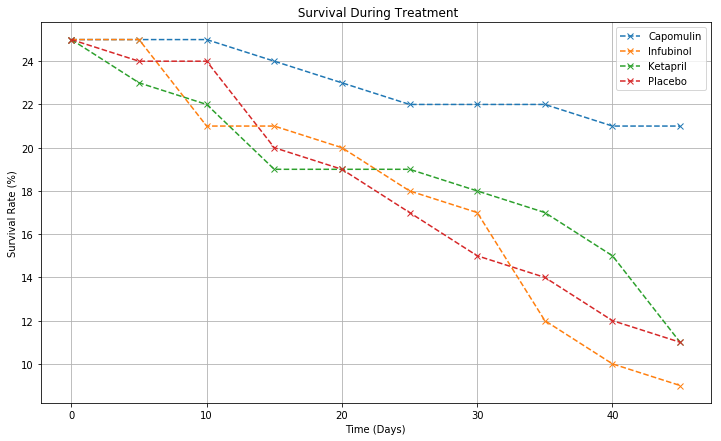

<Figure size 432x288 with 0 Axes>

In [96]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize = (12, 7))

plt.errorbar(x=drug_table3 ['Timepoint'],y=drug_table3 ['Capomulin'], linestyle="--", fmt='x')
plt.errorbar(x=drug_table3 ['Timepoint'],y=drug_table3 ['Infubinol'], linestyle="--", fmt='x')
plt.errorbar(x=drug_table3 ['Timepoint'],y=drug_table3 ['Ketapril'], linestyle="--",fmt='x')
plt.errorbar(x=drug_table3 ['Timepoint'],y=drug_table3 ['Placebo'], linestyle="--", fmt='x')

plt.ylabel("Survival Rate (%)")
plt.xlabel('Time (Days)')
plt.title(' Survival During Treatment')
plt.grid()
plt.legend()       
plt.show()
# Save the Figure
plt.savefig("../SurvivalRespnse.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [97]:
# Calculate the percent changes for each drug
Capomulin_percentage= (drug_table["Capomulin"].iloc[9]-drug_table["Capomulin"].iloc[0])/drug_table["Capomulin"].iloc[0]*100
# Display the data to confirm
Capomulin_percentage


-19.475302667894155

In [99]:
# Calculate the percent changes for each drug
Infubinol_percentage= (drug_table["Infubinol"].iloc[9]-drug_table["Infubinol"].iloc[0])/drug_table["Capomulin"].iloc[0]*100
# Display the data to confirm
Infubinol_percentage

46.12347172785184

In [100]:
# Calculate the percent changes for each drug
Ketapril_percentage= (drug_table["Ketapril"].iloc[9]-drug_table["Ketapril"].iloc[0])/drug_table["Ketapril"].iloc[0]*100
# Display the data to confirm
Ketapril_percentage

57.02879468660604

In [101]:
# Calculate the percent changes for each drug
Placebo_percentage= (drug_table["Placebo"].iloc[9]-drug_table["Placebo"].iloc[0])/drug_table["Placebo"].iloc[0]*100
# Display the data to confirm
Placebo_percentage

51.29796048315153

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [103]:
drug_tuple = {'Capomulin': Capomulin_percentage, 'Infubinol': Infubinol_percentage, 'Ketapril': Ketapril_percentage, 'Placebo': Placebo_percentage}
percentchange_tumorvolume = pd.Series(drug_tuple)
percentchange_tumorvolume

Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

In [ ]:
# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

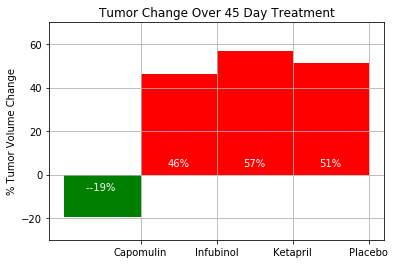